In [36]:
library(dplyr)
library(ggplot2)

In [23]:
file = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/diff_efficiency_by_cell_line.tsv'
df_neuro = read.csv(file, sep='\t')

In [24]:
nrow(df_neuro)
head(df_neuro,2)

[1] 199

donor_id,diff_efficiency
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835


In [25]:
file1 = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/diff_efficiencies.csv'
df_endo = read.csv(file1)

In [26]:
nrow(df_endo)
head(df_endo,2)

[1] 108

donor,ncells,diff_efficiency
aowh_2,95,0.8065728
aoxv_3,71,0.8101674


In [32]:
## join
df_neuro$donor = gsub(".*-","",df_neuro$donor_id)
df = inner_join(df_neuro, df_endo, by = "donor", suffix = c(".neuro",".endo"))
nrow(df)
head(df,2)

Warning message:
“Column `donor` joining character vector and factor, coercing into character vector”

[1] 42

donor_id,diff_efficiency.neuro,donor,ncells,diff_efficiency.endo
HPSI0114i-eipl_1,0.01287835,eipl_1,57,0.8127216
HPSI0114i-vass_1,0.85217391,vass_1,72,0.7914245


In [33]:
cor(df$diff_efficiency.neuro, df$diff_efficiency.endo)
cor.test(df$diff_efficiency.neuro, df$diff_efficiency.endo)

[1] 0.07057388


	Pearson's product-moment correlation

data:  df$diff_efficiency.neuro and df$diff_efficiency.endo
t = 0.44746, df = 40, p-value = 0.657
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2384726  0.3666409
sample estimates:
       cor 
0.07057388 


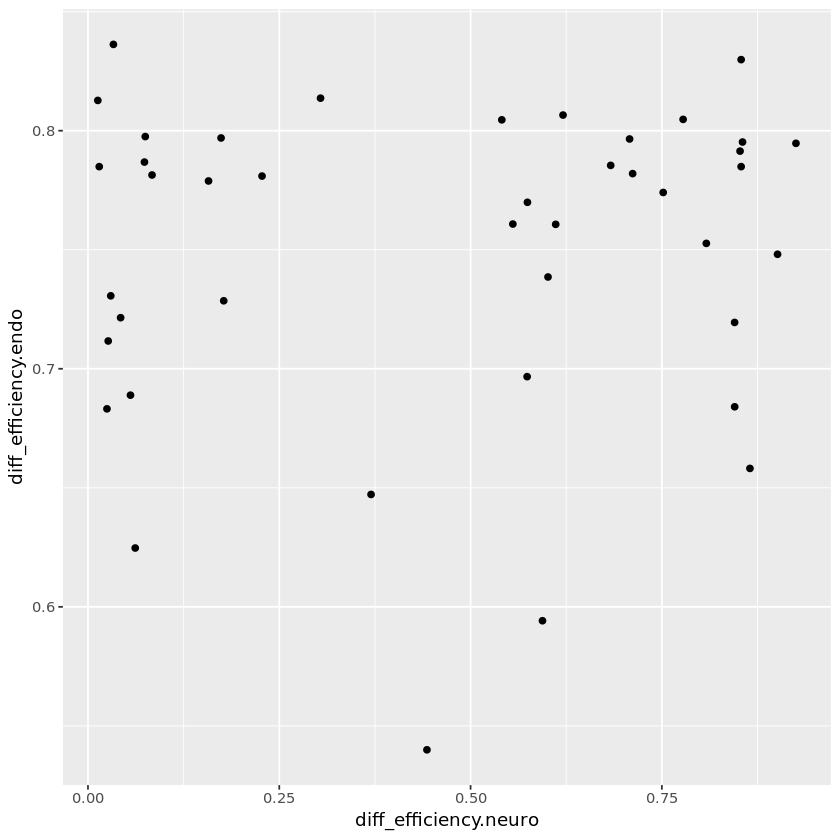

In [37]:
ggplot(df, aes(x = diff_efficiency.neuro, diff_efficiency.endo)) + geom_point()